In [ ]:
import pandas as pd
df = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# describe the data
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   object 
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  family_history_with_overweight  2087 non-null   object 
 12  FAF                             2087 no

In [ ]:
# check for null values
df.isna().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [ ]:
# check for duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

<Axes: xlabel='Gender', ylabel='count'>

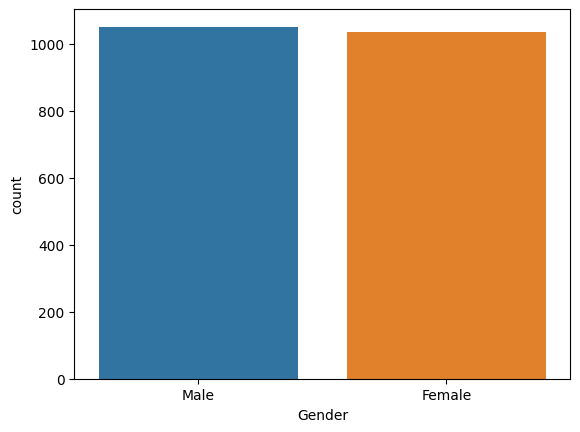

In [ ]:
import  seaborn as sns
count_gender = df['Gender'].value_counts()
sns.barplot(x = count_gender.index, y = count_gender,hue=count_gender.index)

In [ ]:
# smoke count
count_smoke = df.groupby('Gender')['SMOKE'].value_counts()
count_smoke



Gender  SMOKE
Female  no       1020
        yes        15
Male    no       1023
        yes        29
Name: count, dtype: int64

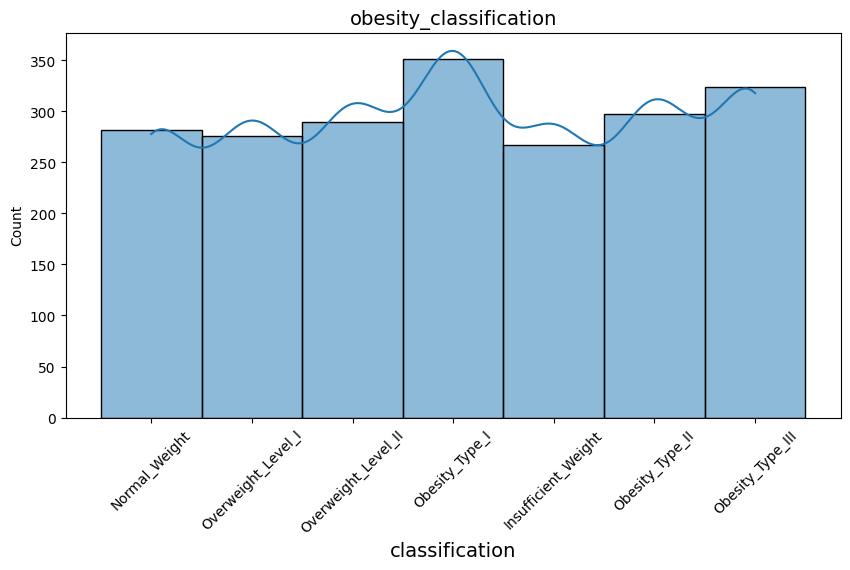

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.histplot(x='NObeyesdad', data=df, kde=True)
plt.title('obesity_classification', fontsize=14)
plt.xlabel('classification', fontsize=14)
plt.xticks(rotation=45)
plt.show()

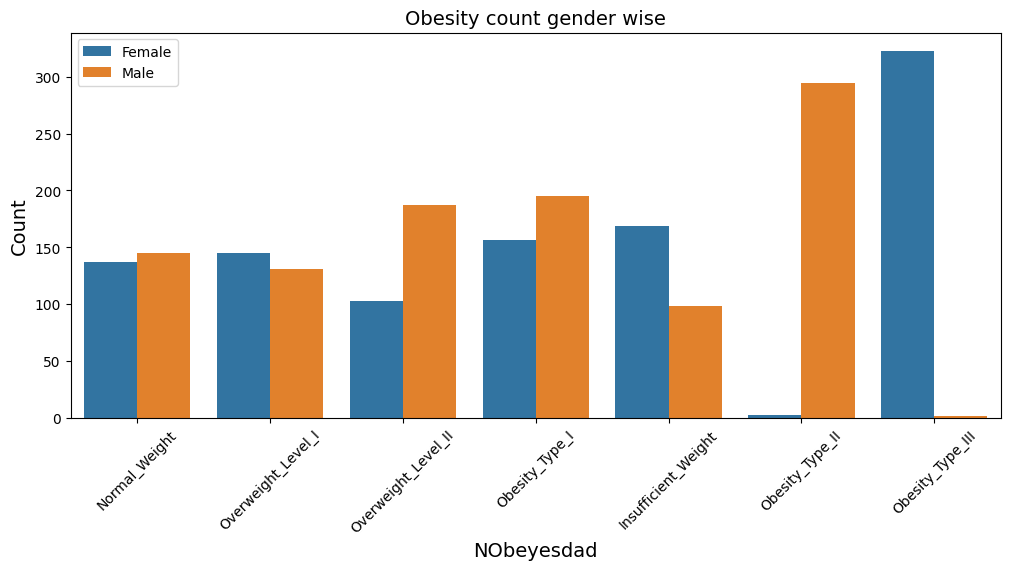

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x='NObeyesdad', data=df, hue='Gender')
plt.title('Obesity count gender wise', fontsize=14)
plt.xlabel('NObeyesdad', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

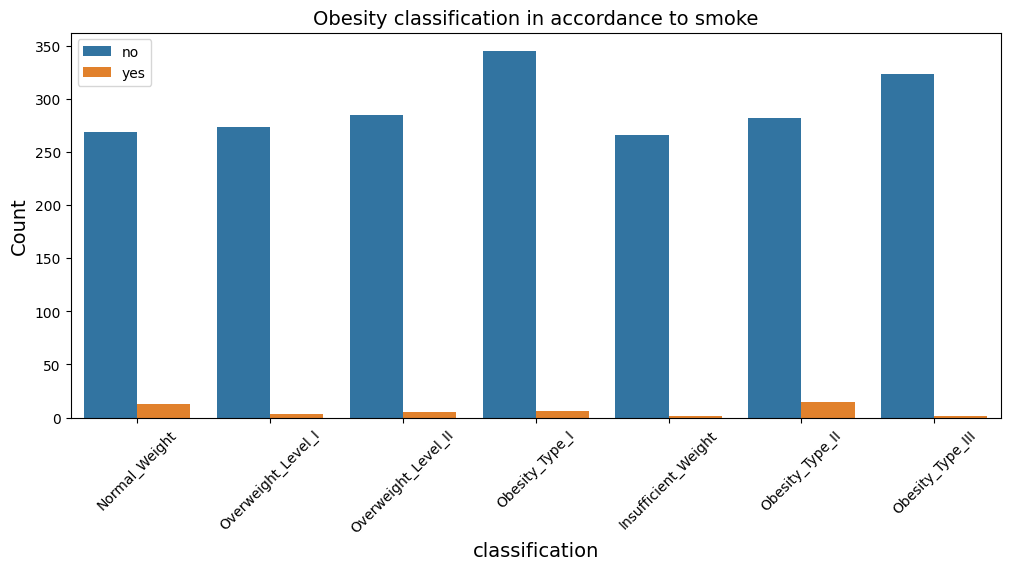

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x='NObeyesdad', data=df, hue='SMOKE')
plt.title('Obesity classification in accordance to smoke', fontsize=14)
plt.xlabel('classification', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

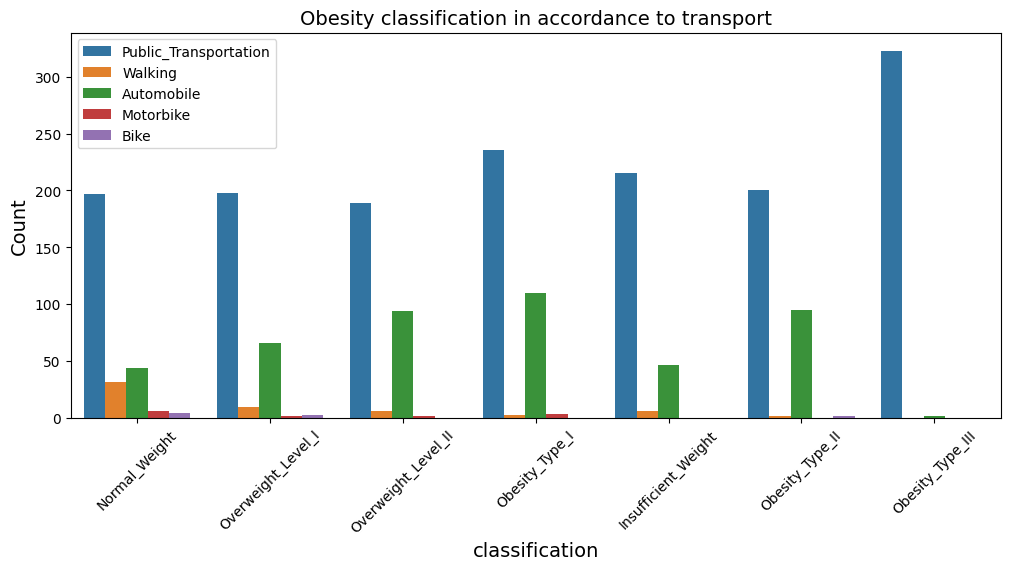

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x='NObeyesdad', data=df, hue='MTRANS')
plt.title('Obesity classification in accordance to transport', fontsize=14)
plt.xlabel('classification', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Feature Engineering
from sklearn.preprocessing import LabelEncoder
Label_encoder=LabelEncoder()
df['Gender'] = Label_encoder.fit_transform(df['Gender'])
df['CALC'] = Label_encoder.fit_transform(df['CALC'])
df['FAVC'] = Label_encoder.fit_transform(df['FAVC'])
df['SCC'] = Label_encoder.fit_transform(df['SCC'])
df['SMOKE'] = Label_encoder.fit_transform(df['SMOKE'])
df['family_history_with_overweight'] = Label_encoder.fit_transform(df['family_history_with_overweight'])
df['CAEC'] = Label_encoder.fit_transform(df['CAEC'])
df['MTRANS'] = Label_encoder.fit_transform(df['MTRANS'])
df['NObeyesdad'] = Label_encoder.fit_transform(df['NObeyesdad'])
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   int64  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   float64
 11  family_history_with_overweight  2087 non-null   int64  
 12  FAF                             2087 no

In [ ]:
# split the data
x = df.drop(['NObeyesdad'],axis = 1)
y = df['NObeyesdad']

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.8)

In [ ]:
# import SVC model
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf',degree = 3, C=1.0, gamma='scale')
svc_model.fit(xtrain,ytrain)

SVC()

In [ ]:
# predicting on the training data
y_train_pred = svc_model.predict(xtrain)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report
print('Accuracy_score:',accuracy_score(ytrain,y_train_pred))
print('Precision_score:',precision_score(ytrain,y_train_pred,average='weighted'))
print('f1_score:',f1_score(ytrain,y_train_pred,average = 'weighted'))
print('classification_report:',classification_report(ytrain,y_train_pred))

Accuracy_score: 0.5995203836930456
Precision_score: 0.6186628727064633
f1_score: 0.5583893472690833
classification_report:               precision    recall  f1-score   support

           0       0.74      0.96      0.84        54
           1       0.59      0.25      0.35        40
           2       0.45      0.75      0.56        77
           3       0.70      0.82      0.75        77
           4       1.00      0.43      0.60        61
           5       0.49      0.71      0.58        55
           6       0.33      0.04      0.07        53

    accuracy                           0.60       417
   macro avg       0.62      0.57      0.54       417
weighted avg       0.62      0.60      0.56       417



In [ ]:
#Testing predictions
y_test_pred = svc_model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report
print('Accuracy_score:',accuracy_score(ytest,y_test_pred))
print('Precision_score:',precision_score(ytest,y_test_pred,average='weighted'))
print('f1_score:',f1_score(ytest,y_test_pred,average = 'weighted'))
print('classification_report:',classification_report(ytest,y_test_pred))

Accuracy_score: 0.537125748502994
Precision_score: 0.5931195759674285
f1_score: 0.4865563771190412
classification_report:               precision    recall  f1-score   support

           0       0.66      0.98      0.79       213
           1       0.64      0.16      0.26       242
           2       0.42      0.74      0.53       274
           3       0.58      0.84      0.68       220
           4       1.00      0.39      0.56       263
           5       0.42      0.65      0.51       221
           6       0.42      0.06      0.11       237

    accuracy                           0.54      1670
   macro avg       0.59      0.55      0.49      1670
weighted avg       0.59      0.54      0.49      1670



In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(xtrain,ytrain)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# training predictions for Logistic regression
y_train_pred_lr = lr_model.predict(xtrain)

In [ ]:
print('Accuracy_score:',accuracy_score(ytrain,y_train_pred_lr))
print('Precision_score:',precision_score(ytrain,y_train_pred_lr,average='weighted'))
print('f1_score:',f1_score(ytrain,y_train_pred_lr,average = 'weighted'))
print('classification_report:',classification_report(ytrain,y_train_pred_lr))

Accuracy_score: 0.7338129496402878
Precision_score: 0.7178762512670797
f1_score: 0.7226299103433833
classification_report:               precision    recall  f1-score   support

           0       0.80      0.87      0.83        54
           1       0.50      0.38      0.43        40
           2       0.66      0.61      0.64        77
           3       0.84      0.97      0.90        77
           4       0.87      1.00      0.93        61
           5       0.65      0.56      0.60        55
           6       0.60      0.57      0.58        53

    accuracy                           0.73       417
   macro avg       0.70      0.71      0.70       417
weighted avg       0.72      0.73      0.72       417



In [ ]:
# test the prediction for logistic regression
y_test_pred_lr = lr_model.predict(xtest)


In [ ]:
print('Accuracy_score:',accuracy_score(ytest,y_test_pred_lr))
print('Precision_score:',precision_score(ytest,y_test_pred_lr,average='weighted'))
print('f1_score:',f1_score(ytest,y_test_pred_lr,average = 'weighted'))
print('classification_report:',classification_report(ytest,y_test_pred_lr))

Accuracy_score: 0.6317365269461078
Precision_score: 0.6123320249654481
f1_score: 0.6185900515771798
classification_report:               precision    recall  f1-score   support

           0       0.73      0.77      0.75       213
           1       0.50      0.41      0.45       242
           2       0.49      0.49      0.49       274
           3       0.77      0.89      0.83       220
           4       0.82      1.00      0.90       263
           5       0.54      0.52      0.53       221
           6       0.45      0.35      0.40       237

    accuracy                           0.63      1670
   macro avg       0.61      0.63      0.62      1670
weighted avg       0.61      0.63      0.62      1670



In [ ]:
# Kneighbous 5
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
y_train_pred_knn = knn_model.predict(xtrain)

In [ ]:
print('Accuracy_score:',accuracy_score(ytrain,y_train_pred_knn))
print('Precision_score:',precision_score(ytrain,y_train_pred_knn,average='weighted'))
print('f1_score:',f1_score(ytrain,y_train_pred_knn,average = 'weighted'))
print('classification_report:',classification_report(ytrain,y_train_pred_knn))

Accuracy_score: 0.8585131894484412
Precision_score: 0.8537354436941741
f1_score: 0.8522256200451787
classification_report:               precision    recall  f1-score   support

           0       0.83      1.00      0.91        54
           1       0.69      0.50      0.58        40
           2       0.86      0.92      0.89        77
           3       0.93      0.97      0.95        77
           4       0.97      0.98      0.98        61
           5       0.76      0.75      0.75        55
           6       0.86      0.70      0.77        53

    accuracy                           0.86       417
   macro avg       0.84      0.83      0.83       417
weighted avg       0.85      0.86      0.85       417



In [ ]:
y_test_pred_knn = knn_model.predict(xtest)

In [ ]:
print('Accuracy_score:',accuracy_score(ytest,y_test_pred_knn))
print('Precision_score:',precision_score(ytest,y_test_pred_knn,average='weighted'))
print('f1_score:',f1_score(ytest,y_test_pred_knn,average = 'weighted'))
print('classification_report:',classification_report(ytest,y_test_pred_knn))

Accuracy_score: 0.7293413173652694
Precision_score: 0.7256899468091861
f1_score: 0.7149682804706824
classification_report:               precision    recall  f1-score   support

           0       0.74      0.94      0.83       213
           1       0.64      0.36      0.46       242
           2       0.70      0.74      0.72       274
           3       0.86      0.95      0.90       220
           4       0.92      0.95      0.94       263
           5       0.55      0.74      0.63       221
           6       0.65      0.44      0.53       237

    accuracy                           0.73      1670
   macro avg       0.72      0.73      0.71      1670
weighted avg       0.73      0.73      0.71      1670



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_train_pred_knn2 = knn_model.predict(xtrain)

In [ ]:
print('Accuracy_score:',accuracy_score(ytrain,y_train_pred_knn2))
print('Precision_score:',precision_score(ytrain,y_train_pred_knn2,average='weighted'))
print('f1_score:',f1_score(ytrain,y_train_pred_knn2,average = 'weighted'))
print('classification_report:',classification_report(ytrain,y_train_pred_knn2))

Accuracy_score: 0.8225419664268585
Precision_score: 0.8166826763838579
f1_score: 0.8144494642395604
classification_report:               precision    recall  f1-score   support

           0       0.82      0.94      0.88        54
           1       0.67      0.45      0.54        40
           2       0.79      0.91      0.84        77
           3       0.91      0.94      0.92        77
           4       0.95      0.98      0.97        61
           5       0.72      0.75      0.73        55
           6       0.78      0.58      0.67        53

    accuracy                           0.82       417
   macro avg       0.80      0.79      0.79       417
weighted avg       0.82      0.82      0.81       417



In [ ]:
y_test_pred_knn2 = knn_model.predict(xtest)

In [ ]:
print('Accuracy_score:',accuracy_score(ytest,y_test_pred_knn2))
print('Precision_score:',precision_score(ytest,y_test_pred_knn2,average='weighted'))
print('f1_score:',f1_score(ytest,y_test_pred_knn2,average = 'weighted'))
print('classification_report:',classification_report(ytest,y_test_pred_knn2))

Accuracy_score: 0.7197604790419162
Precision_score: 0.7203654678157855
f1_score: 0.7049690152167144
classification_report:               precision    recall  f1-score   support

           0       0.74      0.92      0.82       213
           1       0.66      0.36      0.47       242
           2       0.67      0.78      0.72       274
           3       0.85      0.92      0.88       220
           4       0.92      0.95      0.93       263
           5       0.52      0.71      0.60       221
           6       0.66      0.40      0.50       237

    accuracy                           0.72      1670
   macro avg       0.72      0.72      0.70      1670
weighted avg       0.72      0.72      0.70      1670



In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
ranforclassifier = RandomForestClassifier(n_estimators = 200, random_state = 42 ,max_depth=8,  min_samples_split=30)
ranforclassifier.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=8, min_samples_split=30, n_estimators=200,
                       random_state=42)

In [ ]:
#predict the training data
y_train_pred_rf = ranforclassifier.predict(xtrain)

In [ ]:
print('Accuracy_score:',accuracy_score(ytrain,y_train_pred_rf))
print('Precision_score:',precision_score(ytrain,y_train_pred_rf,average='weighted'))
print('f1_score:',f1_score(ytrain,y_train_pred_rf,average = 'weighted'))
print('classification_report:',classification_report(ytrain,y_train_pred_rf))

Accuracy_score: 0.9064748201438849
Precision_score: 0.9127003903144078
f1_score: 0.9000839445032408
classification_report:               precision    recall  f1-score   support

           0       0.78      1.00      0.88        54
           1       0.95      0.47      0.63        40
           2       0.91      0.94      0.92        77
           3       0.94      0.99      0.96        77
           4       1.00      1.00      1.00        61
           5       0.89      0.91      0.90        55
           6       0.90      0.87      0.88        53

    accuracy                           0.91       417
   macro avg       0.91      0.88      0.88       417
weighted avg       0.91      0.91      0.90       417



In [ ]:
y_test_pred_rf = ranforclassifier.predict(xtest)

In [ ]:
print('Accuracy_score:',accuracy_score(ytest,y_test_pred_rf))
print('Precision_score:',precision_score(ytest,y_test_pred_rf,average='weighted'))
print('f1_score:',f1_score(ytest,y_test_pred_rf,average = 'weighted'))
print('classification_report:',classification_report(ytest,y_test_pred_rf))

Accuracy_score: 0.7586826347305389
Precision_score: 0.7768461089547103
f1_score: 0.7344219962307578
classification_report:               precision    recall  f1-score   support

           0       0.63      0.98      0.77       213
           1       0.79      0.22      0.35       242
           2       0.73      0.87      0.79       274
           3       0.87      0.99      0.92       220
           4       1.00      1.00      1.00       263
           5       0.58      0.69      0.63       221
           6       0.80      0.56      0.66       237

    accuracy                           0.76      1670
   macro avg       0.77      0.76      0.73      1670
weighted avg       0.78      0.76      0.73      1670



In [ ]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=42)

In [ ]:
#predicting the deccison tree using train
y_train_pred_dt = dt_model.predict(xtrain)

In [ ]:
print('Accuracy_score:',accuracy_score(ytrain,y_train_pred_dt))
print('Precision_score:',precision_score(ytrain,y_train_pred_dt,average='weighted'))
print('f1_score:',f1_score(ytrain,y_train_pred_dt,average = 'weighted'))
print('classification_report:',classification_report(ytrain,y_train_pred_dt))

Accuracy_score: 1.0
Precision_score: 1.0
f1_score: 1.0
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        77
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        53

    accuracy                           1.00       417
   macro avg       1.00      1.00      1.00       417
weighted avg       1.00      1.00      1.00       417



In [ ]:
y_test_pred_dt = dt_model.predict(xtest)

In [ ]:
print('Accuracy_score:',accuracy_score(ytest,y_test_pred_dt))
print('Precision_score:',precision_score(ytest,y_test_pred_dt,average='weighted'))
print('f1_score:',f1_score(ytest,y_test_pred_dt,average = 'weighted'))
print('classification_report:',classification_report(ytest,y_test_pred_dt))

Accuracy_score: 0.8491017964071856
Precision_score: 0.8473364579887067
f1_score: 0.8480642950403561
classification_report:               precision    recall  f1-score   support

           0       0.84      0.87      0.86       213
           1       0.74      0.72      0.73       242
           2       0.91      0.93      0.92       274
           3       0.95      0.97      0.96       220
           4       1.00      1.00      1.00       263
           5       0.70      0.69      0.69       221
           6       0.76      0.73      0.74       237

    accuracy                           0.85      1670
   macro avg       0.84      0.85      0.84      1670
weighted avg       0.85      0.85      0.85      1670



In [ ]:
#naieve byes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
# predicting the training data on Naiveayes
y_train_pred_nb = nb_model.predict(xtrain)


In [ ]:
print('Accuracy_score:',accuracy_score(ytrain,y_train_pred_nb))
print('Precision_score:',precision_score(ytrain,y_train_pred_nb,average='weighted'))
print('f1_score:',f1_score(ytrain,y_train_pred_nb,average = 'weighted'))
print('classification_report:',classification_report(ytrain,y_train_pred_nb))

Accuracy_score: 0.5947242206235012
Precision_score: 0.5803295192000916
f1_score: 0.538354314086471
classification_report:               precision    recall  f1-score   support

           0       0.62      0.93      0.74        54
           1       0.43      0.07      0.13        40
           2       0.45      0.47      0.46        77
           3       0.54      0.96      0.69        77
           4       1.00      1.00      1.00        61
           5       0.56      0.09      0.16        55
           6       0.44      0.36      0.40        53

    accuracy                           0.59       417
   macro avg       0.58      0.55      0.51       417
weighted avg       0.58      0.59      0.54       417



In [ ]:
#predicting the test data
y_test_pred_nb = nb_model.predict(xtest)


In [ ]:
print('Accuracy_score:',accuracy_score(ytest,y_test_pred_nb))
print('Precision_score:',precision_score(ytest,y_test_pred_nb,average='weighted'))
print('f1_score:',f1_score(ytest,y_test_pred_nb,average = 'weighted'))
print('classification_report:',classification_report(ytest,y_test_pred_nb))

Accuracy_score: 0.5287425149700599
Precision_score: 0.5272923882883184
f1_score: 0.4767943992547123
classification_report:               precision    recall  f1-score   support

           0       0.53      0.79      0.63       213
           1       0.57      0.13      0.21       242
           2       0.34      0.47      0.40       274
           3       0.47      0.99      0.64       220
           4       0.99      0.99      0.99       263
           5       0.32      0.07      0.11       221
           6       0.42      0.26      0.32       237

    accuracy                           0.53      1670
   macro avg       0.52      0.53      0.47      1670
weighted avg       0.53      0.53      0.48      1670

